Nama: Mohammad Hikam 'Abdul Karim

Email: muhamadhikam94@gmail.com

# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import os
from dotenv import load_dotenv
import time


Dataset: Steam Review & Games Dataset

Dataset link: https://www.kaggle.com/datasets/filipkin/steam-reviews?select=output.csv

In [2]:
# Mengimport dataset dari file CSV.
df = pd.read_csv('steam_review.csv')
df.head()

,id,app_id,content,author_id,is_positive
0,181331361,100,At least its a counter strike -1/100,76561199556485100,Negative
1,180872601,100,Uh... So far my playthrough has not been great...,76561199230620391,Negative
2,177836246,100,Better mechanics than cs2,76561198417690647,Negative
3,177287444,100,buggy mess and NOT fun to play at all,76561199077268730,Negative
4,176678990,100,"Whoever came up with this, is gonna fucking ge...",76561199104544266,Negative


In [3]:
# Deskripsi dataset.
df.describe()

,id,app_id,author_id
count,2.011510e+05,201151.000000,2.011510e+05
mean,1.224624e+08,452.899722,7.656120e+16
std,5.896154e+07,322.187389,5.423023e+08
min,2.090000e+02,10.000000,7.656120e+16
25%,7.292665e+07,240.000000,7.656120e+16
50%,1.479831e+08,440.000000,7.656120e+16
75%,1.690541e+08,620.000000,7.656120e+16
max,1.822350e+08,1930.000000,7.656120e+16


In [4]:
# Informasi tentang dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201151 entries, 0 to 201150
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           201151 non-null  int64 
 1   app_id       201151 non-null  int64 
 2   content      200723 non-null  object
 3   author_id    201151 non-null  int64 
 4   is_positive  201151 non-null  object
dtypes: int64(3), object(2)
memory usage: 7.7+ MB


In [5]:
# Shape dari dataset.
df.shape


(201151, 5)

In [6]:
# Cek apakah ada nilai yang duplikat.
df.duplicated().sum()

0

In [7]:
# Cek apakah ada nilai yang hilang
df.isna().sum()

id               0
app_id           0
content        428
author_id        0
is_positive      0
dtype: int64

In [8]:
# Drop/hapus kolom kosong
df = df.dropna(subset=['content'])
df.isna().sum()

id             0
app_id         0
content        0
author_id      0
is_positive    0
dtype: int64

In [9]:
# Preprocessing teks untuk membersihkan data.
def preprocess_text(text):
    
    if text is None:
        return ''
    
    text = text.lower()
    
    text = unidecode(text)
    
    text = text.replace('\r\n', ' ').replace('\n', ' ')
    
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    text = re.sub(r'@\w+', '', text)

    text = re.sub(r'[^\w\s.!?]', '', text)
    
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)
    
    text = re.sub(r'[^\w\s.!?]', '', text)
    
    text = text.strip()
    
    text = re.sub(r'\s+', ' ', text)
    
    return text

In [10]:
# Aplikasi fungsi preprocessing ke kolom 'content' dan simpan hasilnya ke kolom baru 'content_cleaned'.
df['content_cleaned'] = df['content'].apply(preprocess_text)


In [11]:
# Filter ulasan yang sangat pendek (misal, hanya 1 karakter setelah tanda baca dihapus)..
min_char_length = 2
df = df[df['content_cleaned'].str.replace(r'[.!?]', '', regex=True).str.len() >= min_char_length]

In [12]:
# Mapping label sentimen dari teks ('Negative', 'Positive') ke numerik boolean(0, 1).
label_mapping = {'Negative': 0, 'Positive': 1}
df['sentiment_label'] = df['is_positive'].map(label_mapping)

In [13]:
#Tampilkan 100 baris pertama dari kolom 'content_cleaned'.
df['content_cleaned'].head(100)

0                     at least its a counter strike 1100
1      uh.. so far my playthrough has not been great....
2                              better mechanics than cs2
3                  buggy mess and not fun to play at all
4      whoever came up with this is gonna fucking get...
                             ...                        
98                                    thank god its over
99     bintrob note this is a review of the deleted s...
100    really think cs 1.6 is much smoother simpler a...
101    well i got this game from a bundle and save so...
102    same problem with the original but a improveme...
Name: content_cleaned, Length: 100, dtype: object

In [14]:
# Menampilkan 10 baris pertama dari DataFrame.
df.head(10)

,id,app_id,content,author_id,is_positive,content_cleaned,sentiment_label
0,181331361,100,At least its a counter strike -1/100,76561199556485100,Negative,at least its a counter strike 1100,0
1,180872601,100,Uh... So far my playthrough has not been great...,76561199230620391,Negative,uh.. so far my playthrough has not been great....,0
2,177836246,100,Better mechanics than cs2,76561198417690647,Negative,better mechanics than cs2,0
3,177287444,100,buggy mess and NOT fun to play at all,76561199077268730,Negative,buggy mess and not fun to play at all,0
4,176678990,100,"Whoever came up with this, is gonna fucking ge...",76561199104544266,Negative,whoever came up with this is gonna fucking get...,0
5,176118004,100,Every enemy and their grandmother have aimbot ...,76561198296823531,Negative,every enemy and their grandmother have aimbot ...,0
7,171821329,100,Counter Strike: Condition Zero Deleted Scenes(...,76561199032983213,Negative,counter strike condition zero deleted scenes20...,0
8,171639855,100,[REVIEW IS FOR DELETED SCENES] Game is pretty ...,76561198866570651,Negative,review is for deleted scenes game is pretty fu...,0
9,167078851,100,too many enemies,76561199554114911,Negative,too many enemies,0
11,165309201,100,weird,76561198092967794,Negative,weird,0


In [15]:
# Ekspor DataFrame yang telah dibersihkan ke file CSV.
to_csv_path = 'steam_review_cleaned.csv'
df.to_csv(to_csv_path, index=False)

# Eksplorasi Data (EDA)


### I. Karakteristik Umum Dataset

In [16]:
# Q1: Berapa jumlah total ulasan dalam dataset setelah semua proses pembersihan?
total_reviews_cleaned = df.shape[0]
print(f"Q1: Jumlah total ulasan setelah pembersihan: {total_reviews_cleaned}")

Q1: Jumlah total ulasan setelah pembersihan: 196464


In [17]:
# Q2: Apakah masih ada nilai yang hilang (missing values) di kolom-kolom kunci?
missing_values_cleaned = df[['content_cleaned', 'is_positive', 'sentiment_label']].isnull().sum()
print(f"\nQ2: Nilai yang hilang per kolom penting setelah pembersihan:\n{missing_values_cleaned}")



Q2: Nilai yang hilang per kolom penting setelah pembersihan:
content_cleaned    0
is_positive        0
sentiment_label    0
dtype: int64


In [18]:
# Q3: Berapa banyak ulasan unik (berdasarkan teksnya) dalam dataset?
unique_reviews_text_count = df['content_cleaned'].nunique()
print(f"\nQ3: Jumlah ulasan unik (berdasarkan teks 'content_cleaned'): {unique_reviews_text_count}")



Q3: Jumlah ulasan unik (berdasarkan teks 'content_cleaned'): 160392


### II. Analisis Konten Teks Ulasan (`content_cleaned`)

In [19]:
# Q4: Bagaimana distribusi panjang ulasan (jumlah karakter atau jumlah kata)?
df['char_length_cleaned'] = df['content_cleaned'].astype(str).str.len()
df['word_count_cleaned'] = df['content_cleaned'].astype(str).apply(lambda x: len(x.split()))

print(f"\nQ4: Statistik Deskriptif Panjang Ulasan (Karakter) setelah pembersihan:\n{df['char_length_cleaned'].describe()}")
print(f"\nQ4: Statistik Deskriptif Jumlah Kata Ulasan setelah pembersihan:\n{df['word_count_cleaned'].describe()}")



Q4: Statistik Deskriptif Panjang Ulasan (Karakter) setelah pembersihan:
count    196464.000000
mean        142.206822
std         412.888191
min           2.000000
25%          15.000000
50%          41.000000
75%         114.000000
max       45280.000000
Name: char_length_cleaned, dtype: float64

Q4: Statistik Deskriptif Jumlah Kata Ulasan setelah pembersihan:
count    196464.000000
mean         25.547159
std          65.408253
min           1.000000
25%           3.000000
50%           8.000000
75%          22.000000
max        2105.000000
Name: word_count_cleaned, dtype: float64


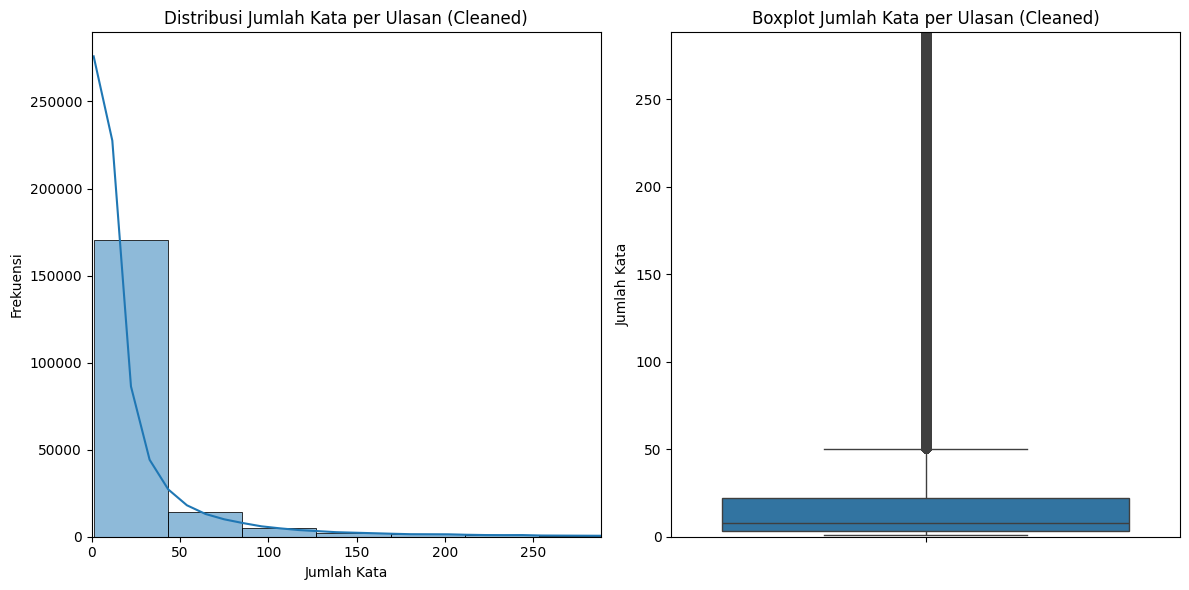

In [20]:
# Visualisasi distribusi panjang ulasan (jumlah kata)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['word_count_cleaned'], bins=50, kde=True) 
plt.title('Distribusi Jumlah Kata per Ulasan (Cleaned)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.xlim(0, df['word_count_cleaned'].quantile(0.99))

plt.subplot(1, 2, 2)
sns.boxplot(y=df['word_count_cleaned'])
plt.title('Boxplot Jumlah Kata per Ulasan (Cleaned)')
plt.ylabel('Jumlah Kata')
plt.ylim(0, df['word_count_cleaned'].quantile(0.99))

plt.tight_layout()
plt.show()

In [21]:
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

stop_words_en = stopwords.words('english')

In [22]:
# Q5: Apa kata-kata (unigrams, bigrams) yang paling sering muncul secara keseluruhan?
corpus_all_cleaned = df['content_cleaned'].dropna().astype(str).str.cat(sep=' ')

words_all_cleaned = [word for word in corpus_all_cleaned.lower().split() if word.isalpha() and word not in stop_words_en]
word_counts_all_cleaned = Counter(words_all_cleaned)
most_common_words_cleaned = word_counts_all_cleaned.most_common(15) # Tampilkan 15 teratas
print(f"\nQ5: 15 Kata Paling Umum (Unigram) Keseluruhan (Cleaned & No Stopwords):\n{most_common_words_cleaned}")



Q5: 15 Kata Paling Umum (Unigram) Keseluruhan (Cleaned & No Stopwords):
[('game', 113540), ('play', 27264), ('good', 25720), ('like', 22914), ('fun', 17562), ('get', 17205), ('dont', 17100), ('valve', 15651), ('one', 15164), ('still', 14102), ('games', 13198), ('even', 13187), ('time', 12711), ('really', 11409), ('life', 11054)]


C:\Users\MHIKAM\AppData\Local\Temp\ipykernel_12192\1421449818.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_most_common_words_cleaned, palette='viridis')


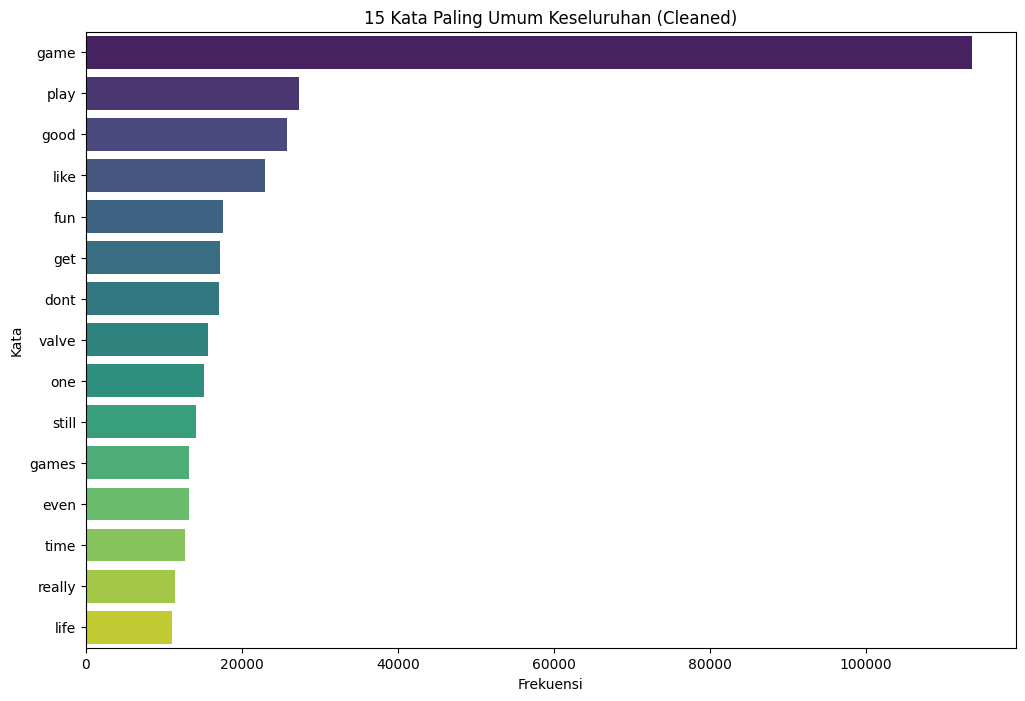

In [23]:
# Visualisasi unigram umum
if most_common_words_cleaned:
    df_most_common_words_cleaned = pd.DataFrame(most_common_words_cleaned, columns=['Kata', 'Frekuensi'])
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Frekuensi', y='Kata', data=df_most_common_words_cleaned, palette='viridis')
    plt.title('15 Kata Paling Umum Keseluruhan (Cleaned)')
    plt.show()


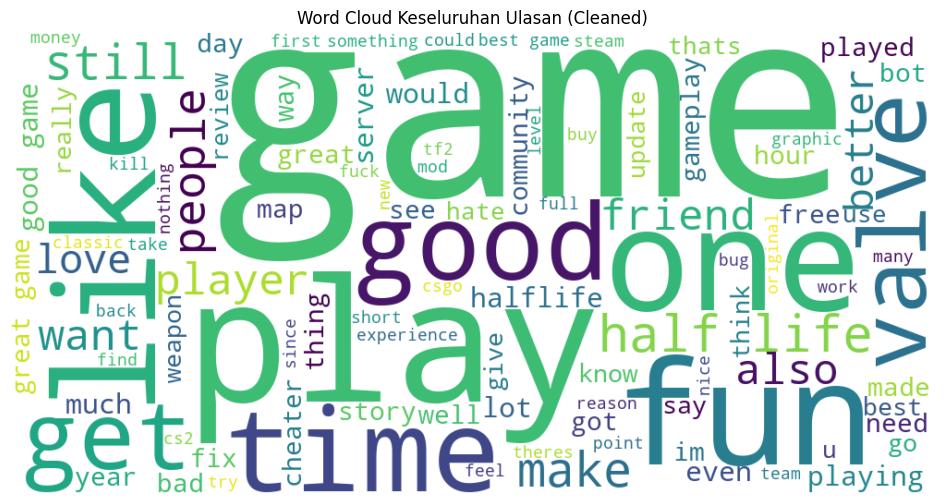

In [24]:
# Word Cloud Keseluruhan
if corpus_all_cleaned.strip():
    wordcloud_all_cleaned = WordCloud(width=1000, height=500, background_color='white', stopwords=stop_words_en, max_words=100).generate(corpus_all_cleaned)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_all_cleaned, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud Keseluruhan Ulasan (Cleaned)')
    plt.show()
else:
    print("Corpus 'content_cleaned' kosong, tidak bisa membuat word cloud keseluruhan.")


In [25]:
# Bigrams
valid_texts_for_bigram = df['content_cleaned'].dropna().astype(str)
if len(valid_texts_for_bigram) > 0:
    try:
        vectorizer_bigram_cleaned = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words_en, token_pattern=r'\b\w+\b', min_df=5) # min_df bisa disesuaikan
        X_bigram_cleaned = vectorizer_bigram_cleaned.fit_transform(valid_texts_for_bigram)
        bigram_counts_cleaned = X_bigram_cleaned.sum(axis=0)
        bigrams_freq_cleaned = [(word, bigram_counts_cleaned[0, idx]) for word, idx in vectorizer_bigram_cleaned.vocabulary_.items()]
        bigrams_freq_cleaned = sorted(bigrams_freq_cleaned, key = lambda x: x[1], reverse=True)
        print(f"\nQ5: 10 Bigram Paling Umum Keseluruhan (Cleaned & No Stopwords):\n{bigrams_freq_cleaned[:10]}")
    except ValueError as e:
        print(f"\nQ5: Tidak cukup data atau vocabulary kosong untuk membuat bigram: {e}")
else:
    print("\nQ5: Tidak ada data teks yang valid untuk analisis bigram.")


Q5: 10 Bigram Paling Umum Keseluruhan (Cleaned & No Stopwords):
[('half life', 8402), ('good game', 5624), ('play game', 3939), ('great game', 3661), ('game ever', 2658), ('halflife 2', 2403), ('black mesa', 2344), ('best game', 2307), ('pew pew', 2194), ('fun game', 2160)]


### III. Analisis Label Sentimen (`is_positive` dan `sentiment_label`)

In [26]:
# Q7: Bagaimana distribusi sentimen ulasan?
sentiment_distribution_cleaned = df['is_positive'].value_counts()
print(f"\nQ7: Distribusi Sentimen (dari 'is_positive'):\n{sentiment_distribution_cleaned}")



Q7: Distribusi Sentimen (dari 'is_positive'):
is_positive
Positive    99743
Negative    96721
Name: count, dtype: int64


C:\Users\MHIKAM\AppData\Local\Temp\ipykernel_12192\1861293229.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_distribution_cleaned.index, y=sentiment_distribution_cleaned.values, palette='pastel')


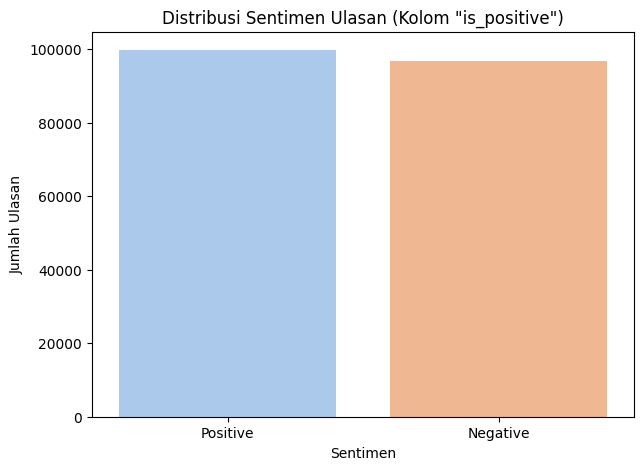

In [27]:
# Visualisasi menggunakan 'is_positive'
plt.figure(figsize=(7, 5))
sns.barplot(x=sentiment_distribution_cleaned.index, y=sentiment_distribution_cleaned.values, palette='pastel')
plt.title('Distribusi Sentimen Ulasan (Kolom "is_positive")')
plt.ylabel('Jumlah Ulasan')
plt.xlabel('Sentimen')
plt.show()

In [28]:
# Distribusi dari kolom 'sentiment_label' yang sudah di-map
sentiment_label_distribution = df['sentiment_label'].value_counts()
print(f"\nQ7: Distribusi Sentimen (dari 'sentiment_label' numerik):\n{sentiment_label_distribution}")


Q7: Distribusi Sentimen (dari 'sentiment_label' numerik):
sentiment_label
1    99743
0    96721
Name: count, dtype: int64


C:\Users\MHIKAM\AppData\Local\Temp\ipykernel_12192\3814516970.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_label_distribution.index, y=sentiment_label_distribution.values, palette='pastel')


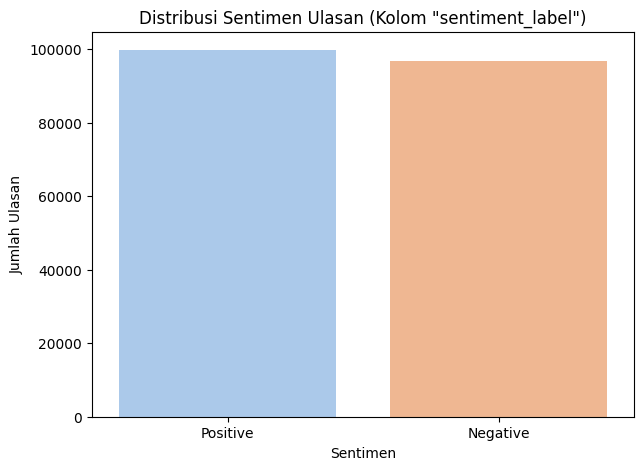

In [29]:
plt.figure(figsize=(7, 5))
sentiment_label_distribution.index = sentiment_label_distribution.index.map({v: k for k, v in label_mapping.items()})
sns.barplot(x=sentiment_label_distribution.index, y=sentiment_label_distribution.values, palette='pastel')
plt.title('Distribusi Sentimen Ulasan (Kolom "sentiment_label")')
plt.ylabel('Jumlah Ulasan')
plt.xlabel('Sentimen')
plt.show()

In [30]:
# Q8: Apakah ada label sentimen selain "Positive" dan "Negative" (atau 0 dan 1)?
unique_sentiments_text = df['is_positive'].unique()
unique_sentiments_numeric = df['sentiment_label'].unique()
print(f"\nQ8: Label Sentimen Unik (Teks 'is_positive'): {unique_sentiments_text}")
print(f"Q8: Label Sentimen Unik (Numerik 'sentiment_label'): {unique_sentiments_numeric}")




Q8: Label Sentimen Unik (Teks 'is_positive'): ['Negative' 'Positive']
Q8: Label Sentimen Unik (Numerik 'sentiment_label'): [0 1]


### IV. Hubungan Antara Konten Teks dan Sentimen

In [31]:
# Q9: Apakah ada perbedaan rata-rata panjang ulasan antara sentimen positif dan negatif?
mean_length_by_sentiment_cleaned = df.groupby('is_positive')['word_count_cleaned'].mean()
print(f"\nQ9: Rata-rata Jumlah Kata (Cleaned) per Sentimen:\n{mean_length_by_sentiment_cleaned}")



Q9: Rata-rata Jumlah Kata (Cleaned) per Sentimen:
is_positive
Negative    30.194146
Positive    21.040965
Name: word_count_cleaned, dtype: float64


C:\Users\MHIKAM\AppData\Local\Temp\ipykernel_12192\3943758958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_positive', y='word_count_cleaned', data=df, palette='pastel')


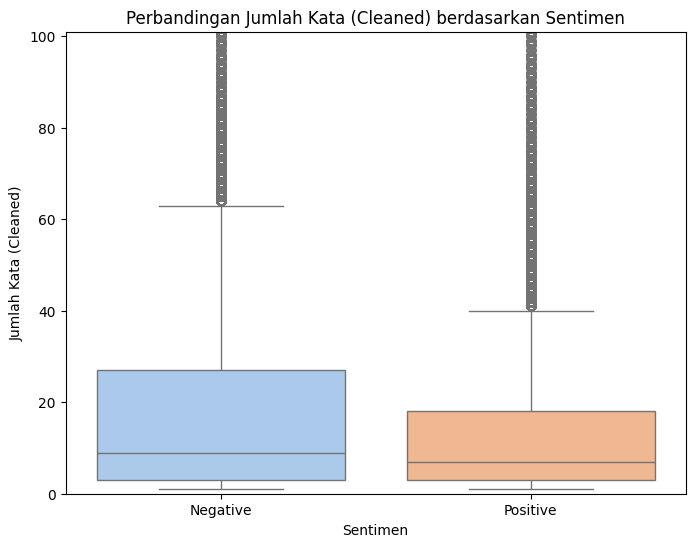

In [32]:
# Visualisasi perbandingan panjang ulasan
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_positive', y='word_count_cleaned', data=df, palette='pastel')
plt.title('Perbandingan Jumlah Kata (Cleaned) berdasarkan Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Kata (Cleaned)')
plt.ylim(0, df['word_count_cleaned'].quantile(0.95))
plt.show()

In [33]:
# Menganalisis kata-kata dan membuat word cloud.
def analyze_sentiment_words(df_sentiment, text_column_name, sentiment_value_text, stop_words_list, n_common_words=15, n_max_words_cloud=100):
    corpus_sentiment = df_sentiment[text_column_name].dropna().astype(str).str.cat(sep=' ')
    
    if not corpus_sentiment.strip():
        print(f"Tidak ada teks untuk dianalisis untuk sentimen '{sentiment_value_text}'.")
        return None

    words_sentiment = [word for word in corpus_sentiment.lower().split() if word.isalpha() and word not in stop_words_list]
    word_counts_sentiment = Counter(words_sentiment)
    most_common_sentiment = word_counts_sentiment.most_common(n_common_words)
    
    print(f"\n{n_common_words} Kata Paling Umum untuk Sentimen '{sentiment_value_text}':\n{most_common_sentiment}")

    # Visualisasi kataa
    if most_common_sentiment:
        df_most_common_sentiment = pd.DataFrame(most_common_sentiment, columns=['Kata', 'Frekuensi'])
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Frekuensi', y='Kata', data=df_most_common_sentiment, hue='Kata', palette='coolwarm', legend=False)
        plt.title(f'{n_common_words} Kata Paling Umum untuk Sentimen {sentiment_value_text}')
        plt.show()

    # Word Cloud
    if corpus_sentiment.strip():
        wordcloud_sentiment = WordCloud(width=1000, height=500, background_color='white', stopwords=stop_words_list, max_words=n_max_words_cloud).generate(corpus_sentiment)
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud_sentiment, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud untuk Sentimen {sentiment_value_text}')
        plt.show()
    else:
        print(f"Corpus kosong setelah pembersihan, tidak bisa membuat Word Cloud untuk '{sentiment_value_text}'.")
        
    return most_common_sentiment


--- Q10 & Q12: Analisis Ulasan Positif ---

15 Kata Paling Umum untuk Sentimen 'Positive':
[('game', 45936), ('good', 17455), ('fun', 12196), ('play', 11140), ('like', 10162), ('still', 8464), ('one', 7628), ('best', 7502), ('great', 7417), ('halflife', 6939), ('life', 6409), ('get', 6150), ('half', 6001), ('really', 5764), ('games', 5706)]


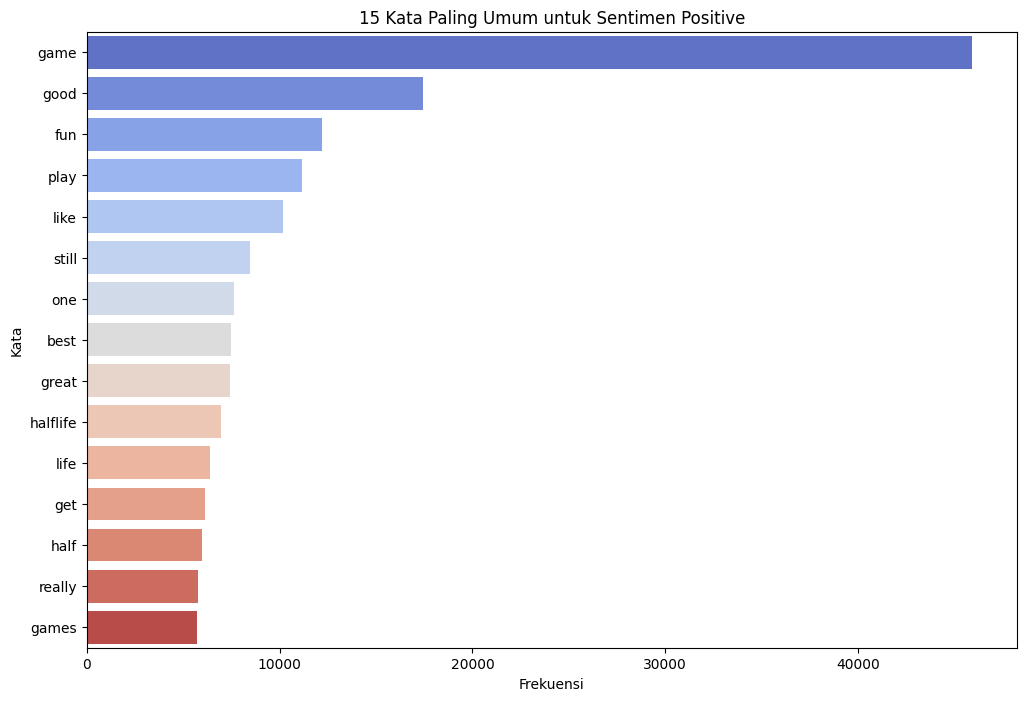

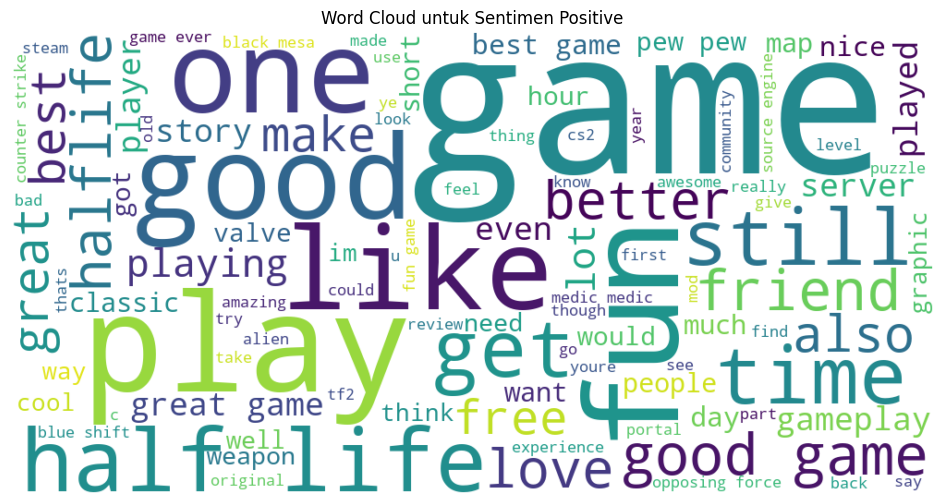

In [34]:
# Q10 & Q12: Kata-kata khas dan Word Cloud untuk ulasan Positif
print("\n--- Q10 & Q12: Analisis Ulasan Positif ---")
df_positive_cleaned = df[df['is_positive'] == 'Positive'].copy()

if not df_positive_cleaned.empty:
    analyze_sentiment_words(
        df_sentiment=df_positive_cleaned, 
        text_column_name='content_cleaned',
        sentiment_value_text='Positive', 
        stop_words_list=stop_words_en
    )
else:
    print("Tidak ada ulasan 'Positive' untuk dianalisis.")


--- Q11 & Q12: Analisis Ulasan Negatif ---

15 Kata Paling Umum untuk Sentimen 'Negative':
[('game', 67604), ('play', 16124), ('valve', 12767), ('like', 12752), ('dont', 12531), ('get', 11055), ('even', 9124), ('bots', 9050), ('fix', 8468), ('good', 8265), ('time', 7922), ('one', 7536), ('games', 7492), ('cant', 6330), ('bad', 6324)]


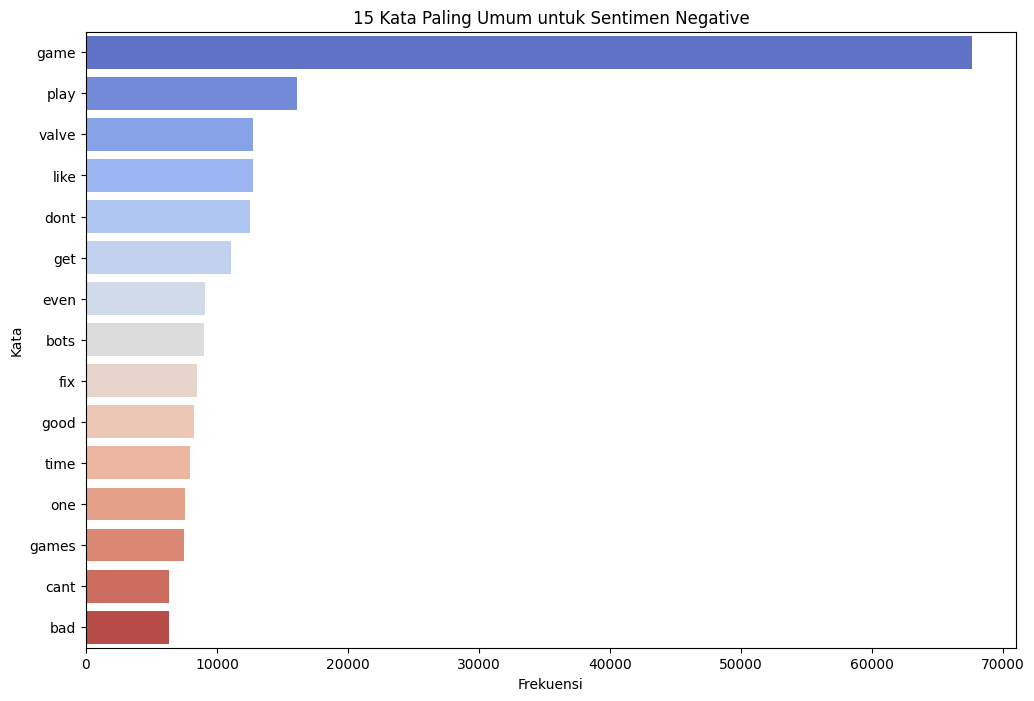

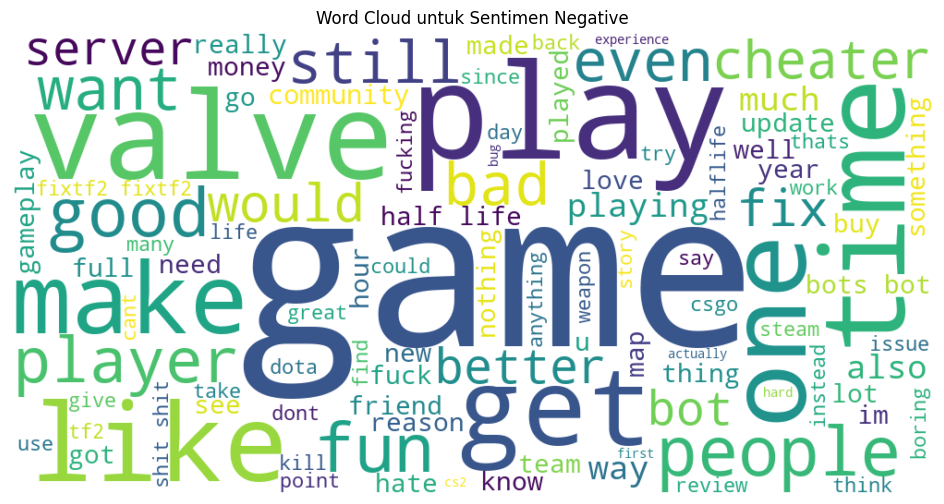

In [35]:
# Q11 & Q12: Kata-kata khas dan Word Cloud untuk ulasan Negatif
print("\n--- Q11 & Q12: Analisis Ulasan Negatif ---")
df_negative_cleaned = df[df['is_positive'] == 'Negative'].copy()

if not df_negative_cleaned.empty:
    analyze_sentiment_words(
        df_sentiment=df_negative_cleaned, 
        text_column_name='content_cleaned',
        sentiment_value_text='Negative', 
        stop_words_list=stop_words_en
    )
else:
    print("Tidak ada ulasan 'Negative' untuk dianalisis.")

# Penerapan Model AI (IBM Granite via Replicate)

In [36]:
# Memuat token API dari file .env
load_dotenv()

api_token = os.environ.get('REPLICATE_API_TOKEN')

if api_token:
    os.environ["REPLICATE_API_TOKEN"] = api_token
    print("Token API Replicate berhasil dimuat dari .env.")
else:
    print("Variabel REPLICATE_API_TOKEN tidak ditemukan di file .env atau variabel lingkungan sistem.")

Token API Replicate berhasil dimuat dari .env.


In [ ]:
# Inisialisasi model Replicate jika token API tersedia.
if api_token:
    from langchain_community.llms import Replicate
    MODEL_ID = "ibm-granite/granite-3.3-8b-instruct"
    try:
        llm = Replicate(
            model=MODEL_ID,
        )
        print(f"Model {MODEL_ID} berhasil diinisialisasi.")
    except Exception as e:
        print(f"Error saat inisialisasi model Replicate: {e}")
        llm = None
else:
    llm = None
    print("Inisialisasi model dilewati karena API token tidak tersedia.")

Model ibm-granite/granite-3.3-8b-instruct berhasil diinisialisasi.


In [ ]:
# Membuat template prompt untuk analisis sentimen dan aspek dari ulasan game.
prompt_template_sentiment_aspect = """
Analyze the following game review.
1. Determine the overall sentiment of the review. The sentiment must be strictly 'Positive' or 'Negative'.
2. List up to 3 key aspects or topics discussed in the review. Focus on aspects like gameplay, bugs, graphics, performance, or sound.
3. If an aspect is not clearly discussed or the review is too short, the aspects list can be 'N/A'.

Review: "{review_text}"

Provide the output STRICTLY in the following format, with each item on a new line:
Sentiment: [Positive/Negative]
Aspects: [Aspect1, Aspect2, Aspect3 or N/A]
"""

# Mendefinisikan parameter model untuk generasi teks.
model_params = {
    "max_new_tokens": 150, 
    "temperature": 0.6,
    "top_p": 0.9,
    "repetition_penalty": 1.1 
}

print("Prompt template dan parameter model telah didefinisikan.")

Prompt template dan parameter model telah didefinisikan.


In [ ]:
# Mendefinisikan fungsi untuk mengirim ulasan ke AI dan mem-parsing outputnya.
def analyze_review_with_ai(review_text, prompt_template, model_parameters=None):

    if not llm: 
        print("Model LLM tidak terinisialisasi. Proses dibatalkan.")
        return None
    if not review_text or not review_text.strip():
        print("Teks ulasan kosong. Proses dibatalkan.")
        return None

    prompt = prompt_template.format(review_text=review_text)
    
    try:
        invoke_params = {}
        if model_parameters:
            for key, value in model_parameters.items():
                if key == 'max_tokens':
                    invoke_params['max_new_tokens'] = value
                elif key == 'temperature':
                    invoke_params['temperature'] = value
                elif key == 'top_k':
                    invoke_params['top_k'] = value
                elif key == 'top_p':
                    invoke_params['top_p'] = value
                elif key == 'repetition_penalty':
                    invoke_params['repetition_penalty'] = value

        if invoke_params:
            response = llm.invoke(prompt, **invoke_params)
        else:
            response = llm.invoke(prompt)
            
        return response.strip()
    except Exception as e:
        print(f"Error saat memanggil model AI untuk teks: '{review_text[:50]}...': {e}")
        return None
    
# Mendefinisika fungsi untuk mengirim ulasan ke AI dan mem-parsing outputnya.\
if 'df' in locals() and hasattr(df, 'empty') and not df.empty and 'llm' in locals() and llm:
    
    # Mengambil sampel acak dari DataFrame untuk analisis.
    sample_size = min(50, len(df)) 
    sample_df = df.sample(n=sample_size, random_state=42).copy()

    ai_predicted_sentiments = []
    ai_extracted_aspects_list = []

    print(f"\nMemproses {len(sample_df)} sampel ulasan dengan AI (Model: {MODEL_ID})...")

    # iterasi melalui setiap baris dalam sampel DataFrame.
    for index, row in sample_df.iterrows():
        review_text = str(row['content_cleaned']) 
        actual_label = row.get('is_positive', 'N/A') 

        print(f"\n----\nMenganalisis ulasan (ID Data Asli: {row.get('id', index)}, Label Asli: {actual_label}):")
        print(f"Teks Ulasan: {review_text[:150]}...") 

        ai_output = analyze_review_with_ai(review_text, prompt_template_sentiment_aspect, model_params)

        predicted_sentiment_from_ai = "Error/Parsing Failed"
        aspects_from_ai = "Error/Parsing Failed"

        if ai_output:
            print(f"Output Mentah AI: \n{ai_output}")
            try:
                lines = ai_output.split('\n')
                sentiment_found = False
                aspects_found = False
                temp_aspects = []

                for line in lines:
                    line_lower = line.lower().strip()
                    if line_lower.startswith("sentiment:"):
                        predicted_sentiment_from_ai = line.split(":", 1)[1].strip()
                        sentiment_found = True
                    elif line_lower.startswith("aspects:"):
                        aspect_str = line.split(":", 1)[1].strip()
                        if aspect_str.lower() != "n/a" and aspect_str:
                            temp_aspects = [aspect.strip() for aspect in re.split(r',|;', aspect_str) if aspect.strip()]
                        else:
                            temp_aspects = ["N/A"]
                        aspects_found = True
                
                if not sentiment_found:
                    print("Peringatan: Format 'Sentiment:' tidak ditemukan dalam output AI.")
                if not aspects_found:
                    print("Peringatan: Format 'Aspects:' tidak ditemukan dalam output AI.")
                
                aspects_from_ai = ", ".join(temp_aspects) if temp_aspects else "N/A"

            except Exception as e:
                print(f"Error saat parsing output AI: {e}")
        else:
            print("Tidak ada output dari AI atau terjadi error pada pemanggilan.")

        ai_predicted_sentiments.append(predicted_sentiment_from_ai)
        ai_extracted_aspects_list.append(aspects_from_ai)
        
        print(f"Hasil Parsing -> Sentimen AI: {predicted_sentiment_from_ai}, Aspek AI: {aspects_from_ai}")
        
        time.sleep(2)

    # Menyimpan hasil analisis AI ke dalam DataFrame sampel dan menampilkannya.
    sample_df['ai_sentiment'] = ai_predicted_sentiments
    sample_df['ai_aspects'] = ai_extracted_aspects_list

    print("\n\n--- Hasil Analisis AI pada Sampel Data ---")
    print(sample_df[['id', 'content_cleaned', 'is_positive', 'ai_sentiment', 'ai_aspects']])
    
else:
    if not ('df' in locals() and hasattr(df, 'empty') and not df.empty):
        print("DataFrame 'df' tidak ditemukan atau kosong. Muat dan proses data Anda terlebih dahulu.")
    if not ('llm' in locals() and llm):
        print("Model LLM tidak diinisialisasi. Tidak dapat melanjutkan dengan analisis AI.")



Memproses 50 sampel ulasan dengan AI (Model: ibm-granite/granite-3.3-8b-instruct)...

----
Menganalisis ulasan (ID Data Asli: 181782359, Label Asli: Positive):
Teks Ulasan: one 18.25 ounce package chocolate cake mix. one can prepared coconut pecan frosting. three slash four cup vegetable oil. four large eggs. one cup semi...
Output Mentah AI: 
Sentiment: Negative
Aspects: N/A (The review does not discuss any game-related aspects, instead, it lists an incoherent mix of ingredients, materials, and objects unrelated to gaming.)
Hasil Parsing -> Sentimen AI: Negative, Aspek AI: N/A (The review does not discuss any game-related aspects, instead, it lists an incoherent mix of ingredients, materials, and objects unrelated to gaming.)

----
Menganalisis ulasan (ID Data Asli: 160295421, Label Asli: Positive):
Teks Ulasan: for some reason the controls in this are way worse than hl1. also has same problems as hl1 but bigger. its okay but i wouldnt recommend unless you rea...
Output Mentah AI: 
S

## Penyimpanan Hasil Analisis Sampel untuk Aplikasi Streamlit

In [ ]:
# Print hasil analisis AI pada sampel data.
print(sample_df[['id', 'content_cleaned', 'is_positive', 'ai_sentiment', 'ai_aspects']].head())

               id                                    content_cleaned  \
131883  181782359  one 18.25 ounce package chocolate cake mix. on...   
78218   160295421  for some reason the controls in this are way w...   
11878    35316871  maybe this was fun in the 200s but i dont reco...   
162650  179602511                                   nagev goes crazy   
155831  170355909                                                asr   

       is_positive ai_sentiment  \
131883    Positive     Negative   
78218     Positive     Negative   
11878     Negative     Negative   
162650    Positive     Negative   
155831    Positive     Negative   

                                               ai_aspects  
131883  N/A (The review does not discuss any game-rela...  
78218                                                 N/A  
11878       Game relevance, fun factor, outdated features  
162650                                                N/A  
155831                                                N/

In [ ]:
# Simpan DataFrame sampel dengan hasil analisis AI ke file CSV untuk Streamlit.
output_sampel = 'sampel_analisis.csv'
kolom_streamlit = ['id', 'content_cleaned', 'is_positive', 'ai_sentiment', 'ai_aspects']

for col in kolom_streamlit:
    if col not in sample_df.columns:
        sample_df[col] = "N/A"

try:
    sample_df_to_save = sample_df[kolom_streamlit]
    sample_df_to_save.to_csv(output_sampel, index=False)
    print(f"DataFrame sampel dengan hasil analisis AI telah disimpan ke '{output_sampel}'")
except KeyError as e:
    print(f"Error: Satu atau lebih kolom tidak ditemukan di sample_df: {e}")
    print(f"Kolom yang ada di sample_df: {sample_df.columns.tolist()}")
    print("Harap periksa kembali nama kolom di 'kolom_untuk_streamlit'.")
except Exception as e:
    print(f"Terjadi error saat menyimpan file CSV: {e}")

DataFrame sampel dengan hasil analisis AI telah disimpan ke 'sampel_analisis.csv'
